In [1]:
!pip3 install nltk

     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ------------------- -------------------- 20.5/41.5 kB ? eta -:--:--
     -------------------------------------- 41.5/41.5 kB 666.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------  1.5/1.5 MB 46.7 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 31.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/269.7 kB ? eta -:--:--
   ---------------------------------------- 269.7/269.7 kB ? eta 0:00:00
   ---------------------------------------- 0.0/97.9 kB ? eta -:--:--
   ---------------------------------------- 97.9/97.9 kB ? eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/haram4th/ablearn/main/yelp.csv', index_col = 0)
data

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
2967245,aMleVK0lQcOSNCs56_gSbg,miHaLnLanDKfZqZHet0uWw,Xp_cWXY5rxDLkX-wqUg-iQ,5,2015-09-30,LOVE the cheeses here. They are worth the pri...,0,0,1
4773684,Hs1f--t9JnVKW9A1U2uhKA,r_RUQSGZcd5bSgmTcS5IfQ,NuGZD3yBVqzpY1HuzT26mQ,5,2015-06-04,This has become our go-to sushi place. The sus...,0,0,0
1139855,i7aiPgNrNaFoM8J_j2OSyQ,zz7lojg6QdZbKFCJiHsj7w,ii8sAGBexBOJoYRFafF9XQ,1,2016-07-03,I was very disappointed with the hotel. The re...,2,1,1
3997153,uft6iMwNQh4I2UDpmbXggA,p_oXN3L9oi8nmmJigf8c9Q,r0j4IpUbcdC1-HfoMYae4w,5,2016-10-15,Love this place - super amazing - staff here i...,0,0,0
4262000,y9QmJ16mrfBZS6Td6Yqo0g,jovtGPaHAqP6XfG9BFwY7A,j6UwIfXrSkGTdVkRu7K6WA,5,2017-03-14,Thank you Dana!!!! Having dyed my hair black p...,0,0,0
...,...,...,...,...,...,...,...,...,...
1567641,t6YoK3vK6zTvodv-uAe5NA,eA-KLkSEq9RYt9-RfNZXCA,CbyXUOpH2TgFox46Be2LVQ,5,2013-08-01,I'm a sucker for places like this. Get me in f...,3,1,3
4910763,GFho96BYQZR7M75Qm-WHWA,KW_y5oQgAbifGQQA0cgCjQ,815I4_qtNd9Whd5joLZhAQ,1,2017-01-08,Extremely rude staff! Was told 4 min on a lar...,0,0,0
1036315,TEOItriKpYAQ9UyzWgIXDA,n4E9jR6ep7hcIi2esSCmNg,5Go1tSAVqNOXgvMr_fz9Sw,5,2015-06-15,I live in NYC and went to the RTR here in the ...,1,0,0
555962,cNCcrb_Vc0Tlx_06l1SQSw,NWW8yE6Bt4zENt4a0Et9Sg,yh5NcT0o9W_XdqdsEkxNZQ,5,2017-03-03,"If you are looking for a trainer, then look no...",0,0,0


In [4]:
#워드 클라우드 ->단어의 빈도 확인

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 2967245 to 838267
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    10000 non-null  object
 1   user_id      10000 non-null  object
 2   business_id  10000 non-null  object
 3   stars        10000 non-null  int64 
 4   date         10000 non-null  object
 5   text         10000 non-null  object
 6   useful       10000 non-null  int64 
 7   funny        10000 non-null  int64 
 8   cool         10000 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 781.2+ KB


In [6]:
data.describe()

,stars,useful,funny,cool
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.012800,1.498800,0.464200,0.542500
std,1.724684,6.339355,1.926523,2.010273
min,1.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000
75%,5.000000,2.000000,0.000000,0.000000
max,5.000000,533.000000,83.000000,97.000000


In [7]:
data.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
2967245,aMleVK0lQcOSNCs56_gSbg,miHaLnLanDKfZqZHet0uWw,Xp_cWXY5rxDLkX-wqUg-iQ,5,2015-09-30,LOVE the cheeses here. They are worth the pri...,0,0,1
4773684,Hs1f--t9JnVKW9A1U2uhKA,r_RUQSGZcd5bSgmTcS5IfQ,NuGZD3yBVqzpY1HuzT26mQ,5,2015-06-04,This has become our go-to sushi place. The sus...,0,0,0
1139855,i7aiPgNrNaFoM8J_j2OSyQ,zz7lojg6QdZbKFCJiHsj7w,ii8sAGBexBOJoYRFafF9XQ,1,2016-07-03,I was very disappointed with the hotel. The re...,2,1,1
3997153,uft6iMwNQh4I2UDpmbXggA,p_oXN3L9oi8nmmJigf8c9Q,r0j4IpUbcdC1-HfoMYae4w,5,2016-10-15,Love this place - super amazing - staff here i...,0,0,0
4262000,y9QmJ16mrfBZS6Td6Yqo0g,jovtGPaHAqP6XfG9BFwY7A,j6UwIfXrSkGTdVkRu7K6WA,5,2017-03-14,Thank you Dana!!!! Having dyed my hair black p...,0,0,0


In [8]:
data.drop(['review_id','user_id','business_id','date'],axis=1, inplace = True)

axis = 1 과 inplace = True 를 해주어야 함을 기억하자. inplace = True 는 저장을 해준다.

In [9]:
data.head()

,stars,text,useful,funny,cool
2967245,5,LOVE the cheeses here. They are worth the pri...,0,0,1
4773684,5,This has become our go-to sushi place. The sus...,0,0,0
1139855,1,I was very disappointed with the hotel. The re...,2,1,1
3997153,5,Love this place - super amazing - staff here i...,0,0,0
4262000,5,Thank you Dana!!!! Having dyed my hair black p...,0,0,0


In [10]:
data.iloc[0]['text']

'LOVE the cheeses here.  They are worth the price.  Great for finding treats for a special dinner or picnic.  Nice on sample days. Yum!!! Top quality meats. Nice selection of non brand frozen veggies.  Veggie chips are mega tasty.  Always quick and friendly check out.  Produce not as stellar as it once was, but also not finding better in Madison.'

In [11]:
data.iloc[0]

stars                                                     5
text      LOVE the cheeses here.  They are worth the pri...
useful                                                    0
funny                                                     0
cool                                                      1
Name: 2967245, dtype: object

In [12]:
len(data.iloc[0]['text'])

347

In [13]:
data['text'].apply(len)

2967245     347
4773684     377
1139855     663
3997153     141
4262000     455
           ... 
1567641     779
4910763     268
1036315    1288
555962     1160
838267      137
Name: text, Length: 10000, dtype: int64

각각의 관측치가 몇개의 텍스트가 있는지 확인 할 수 있다.

이것을 data['text_length'] = data['text'].apply(len) 으로 할당한다.

In [14]:
data['text_length'] = data['text'].apply(len)

In [15]:
data.head()

,stars,text,useful,funny,cool,text_length
2967245,5,LOVE the cheeses here. They are worth the pri...,0,0,1,347
4773684,5,This has become our go-to sushi place. The sus...,0,0,0,377
1139855,1,I was very disappointed with the hotel. The re...,2,1,1,663
3997153,5,Love this place - super amazing - staff here i...,0,0,0,141
4262000,5,Thank you Dana!!!! Having dyed my hair black p...,0,0,0,455


text_length 의 컬럼이 하나 더 추가됨을 확인 할 수 있다.

stars (별점)을 확인해 보자.

In [16]:
data['stars'].value_counts()

stars
5    7532
1    2468
Name: count, dtype: int64

5점과 1점 만이 있음을 확인할 수 있고, 갯수는 확인이 가능하다. 이것을 그래프로 나타내 보자.

<Axes: ylabel='count'>

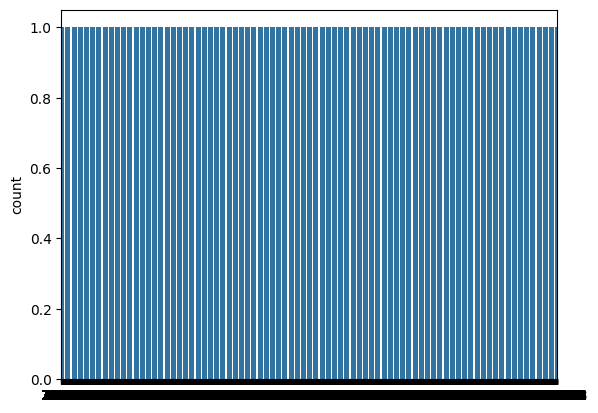

In [17]:
sns.countplot(data['stars'])

C:\Users\5-06\AppData\Local\Temp\ipykernel_1772\296649755.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['text_length'])


<Axes: xlabel='text_length', ylabel='Density'>

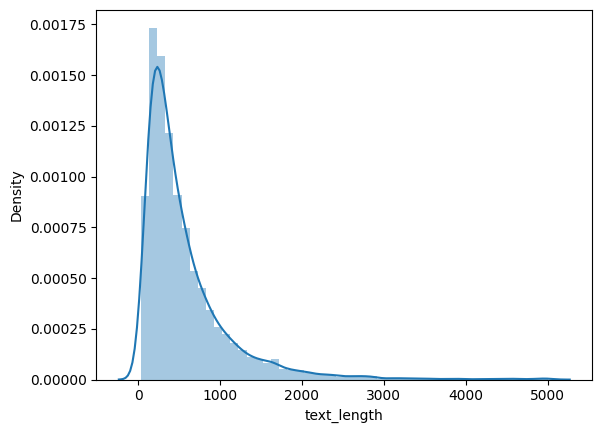

In [18]:
sns.distplot(data['text_length'])

0 ~ 1000개 사이가 가장 많음을 확인 할 수 있다.

In [19]:
data.corr()

ValueError: could not convert string to float: 'LOVE the cheeses here.  They are worth the price.  Great for finding treats for a special dinner or picnic.  Nice on sample days. Yum!!! Top quality meats. Nice selection of non brand frozen veggies.  Veggie chips are mega tasty.  Always quick and friendly check out.  Produce not as stellar as it once was, but also not finding better in Madison.'

In [ ]:
sns.heatmap(data.corr())

In [ ]:
sns.heatmap(data.corr(), cmap = 'coolwarm')

# 